### Machine learning model prediction of campagns insights with Python and Scikit Learn 

In [62]:
# import necessary python modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the excel dataset provided, parsing to Datetime format and formatting of unset values 

data = pd.read_excel('Data Analyst Assignment.xlsx', index_col=0, header=0, parse_dates=True, na_values="'-")
data.head()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
Date,,,,,,,,,,,,,,,
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,18-24,0.00,2,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,25-34,0.00,5,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,35-44,0.00,1,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,Undetermined,14.63,5,3,0.0
2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,18-24,53.31,10,2,0.0


In [3]:
# drop each rows which contains values not provided

data.dropna(axis=0, inplace=True)

In [4]:
# create a DataFrame which contains insights colums (impressions, clicks, link_clicks) only

insights = data.drop(['product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'spends'], axis=1)
insights.shape

(1187, 3)

In [5]:
# feature engineering from all insights colums to one colums with scikitlearn polynomialFeature

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)
data["polynomial_feature"] = poly.fit_transform(insights).mean(axis=1)

Text(0.5, 1.0, 'Insights')

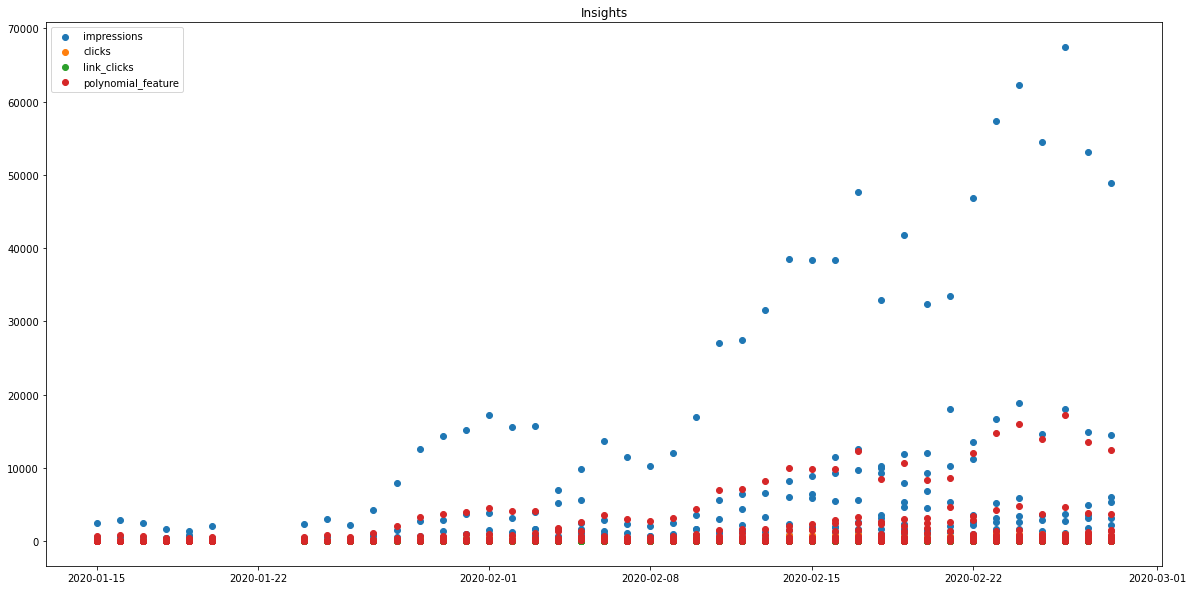

In [6]:
# Plotting scatter between each insight and the new create feature to verify   

plt.figure(figsize=(20, 10))
plt.scatter(data["2020-01-15":"2020-02-28"].index, data["2020-01-15":"2020-02-28"]["impressions"], label = "impressions")
plt.scatter(data["2020-01-15":"2020-02-28"].index, data["2020-01-15":"2020-02-28"]["clicks"], label = "clicks")
plt.scatter(data["2020-01-15":"2020-02-28"].index, data["2020-01-15":"2020-02-28"]["link_clicks"], label = "link_clicks")
plt.scatter(data["2020-01-15":"2020-02-28"].index, data["2020-01-15":"2020-02-28"]["polynomial_feature"], label = "polynomial_feature")
plt.legend()
plt.title("Insights")

In [7]:
# Separate target and features in 2 datasets 

X = data.drop(["product", "phase", 'impressions', 'clicks',
       'link_clicks', 'polynomial_feature'], axis=1)
y = data['polynomial_feature']

In [8]:
# Split train set (2 months) and test set (the last month)

X_train, X_test, y_train, y_test = X["2019-12-16":"2020-02-15"], X["2020-02-16":"2020-03-20"], y["2019-12-16":"2020-02-15"], y["2020-02-16":"2020-03-20"]

In [9]:
# Model creation with advanced pipeline combination

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDRegressor

# creation of 2 feature types which will be formated in differents way
numerical_features = ['spends']
categorie_variables = ['campaign_platform', 'campaign_type', 'communication_medium',
       'subchannel', 'audience_type', 'creative_type', 'creative_name',
       'device', 'age']

# creation of 2 pipelines types which uses 2 differentes transformers according to the datatype
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorie_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# preprocessing of datatypes
preprocessor = make_column_transformer((numerical_pipeline,  numerical_features), (categorie_pipeline, categorie_variables))

# last pipeline with SGDRegressor estimator implementing
model = make_pipeline(preprocessor, SGDRegressor(random_state=0))
model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['spends']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['campaign_plat

In [10]:
# Score results
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9388499356051812, 0.9770177960339899)

In [11]:
# create a Pandas DataFrame with target test set as y_test and model prediction of the test features set
comparison = pd.DataFrame({"y_test": y_test, "prediction": model.predict(X_test)})

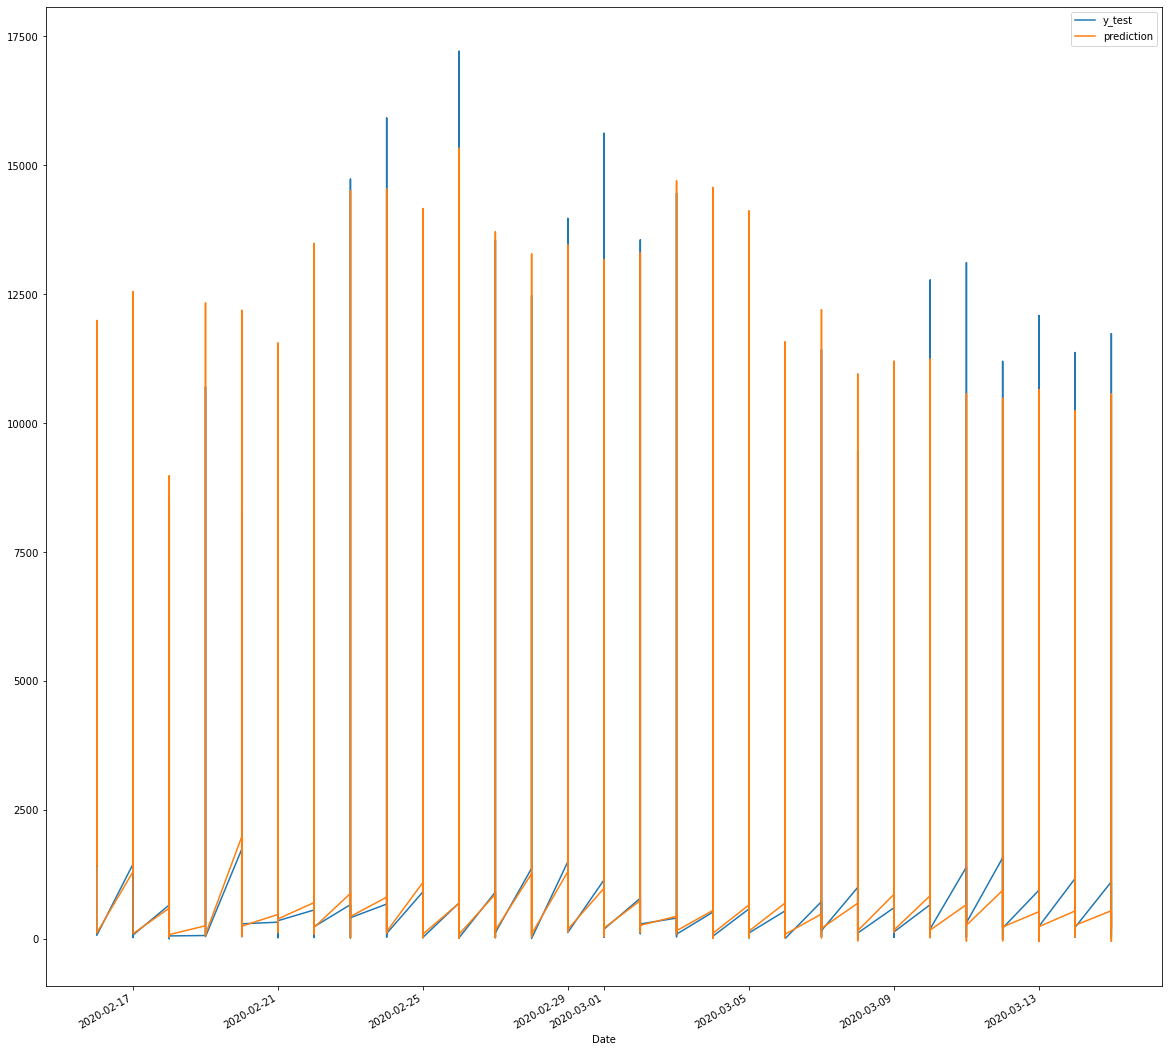

In [12]:
# Plot the comparison between predictions and real values of the test set
comparison["2020-01-15":"2020-03-15"].plot(figsize=(20, 20))

In [82]:
# I use SelectKBest and to select features and remove if necessary with f_classif anova statistical test
from sklearn.feature_selection import SelectKBest, f_classif


selector = make_pipeline(SelectKBest(f_classif, k=11), SGDRegressor(random_state=0))

model = make_pipeline(preprocessor, selector)
model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['spends']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['campaign_plat

In [84]:
# Score results with GridSearch
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9388739549672084, 0.9770140300962201)

### results with SelectKBest are close to standard results